In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('dataset/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
col_string = df.select_dtypes(include=['object']).columns
df[col_string] = df[col_string].astype('string')

In [6]:
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
col_string = df.select_dtypes("string").columns.to_list()

In [9]:
num_col=df.columns.to_list()
#print(num_col)
for col in col_string:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [10]:
num_col

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [11]:
col_string

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [12]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# EDA

px.imshow(df.corr(), title='Correlation Matrix')

In [14]:
num_col.append("HeartDisease")
df_numeric = df[num_col]
correlation = df_numeric.corr()

px.imshow(correlation.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [15]:
fig = px.histogram(df, x = "HeartDisease", color = "Sex",hover_data=df.columns, title = "Heart Disease Distribution by Sex", barmode="group")
fig.show()

In [16]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [17]:
fig = px.histogram(df, x = 'Sex', hover_data=df.columns, title='Sex Distribution')
fig.show()

In [18]:
fig = px.histogram(df, x = 'RestingECG', hover_data=df.columns, title='Disribution of Resting ECG')
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

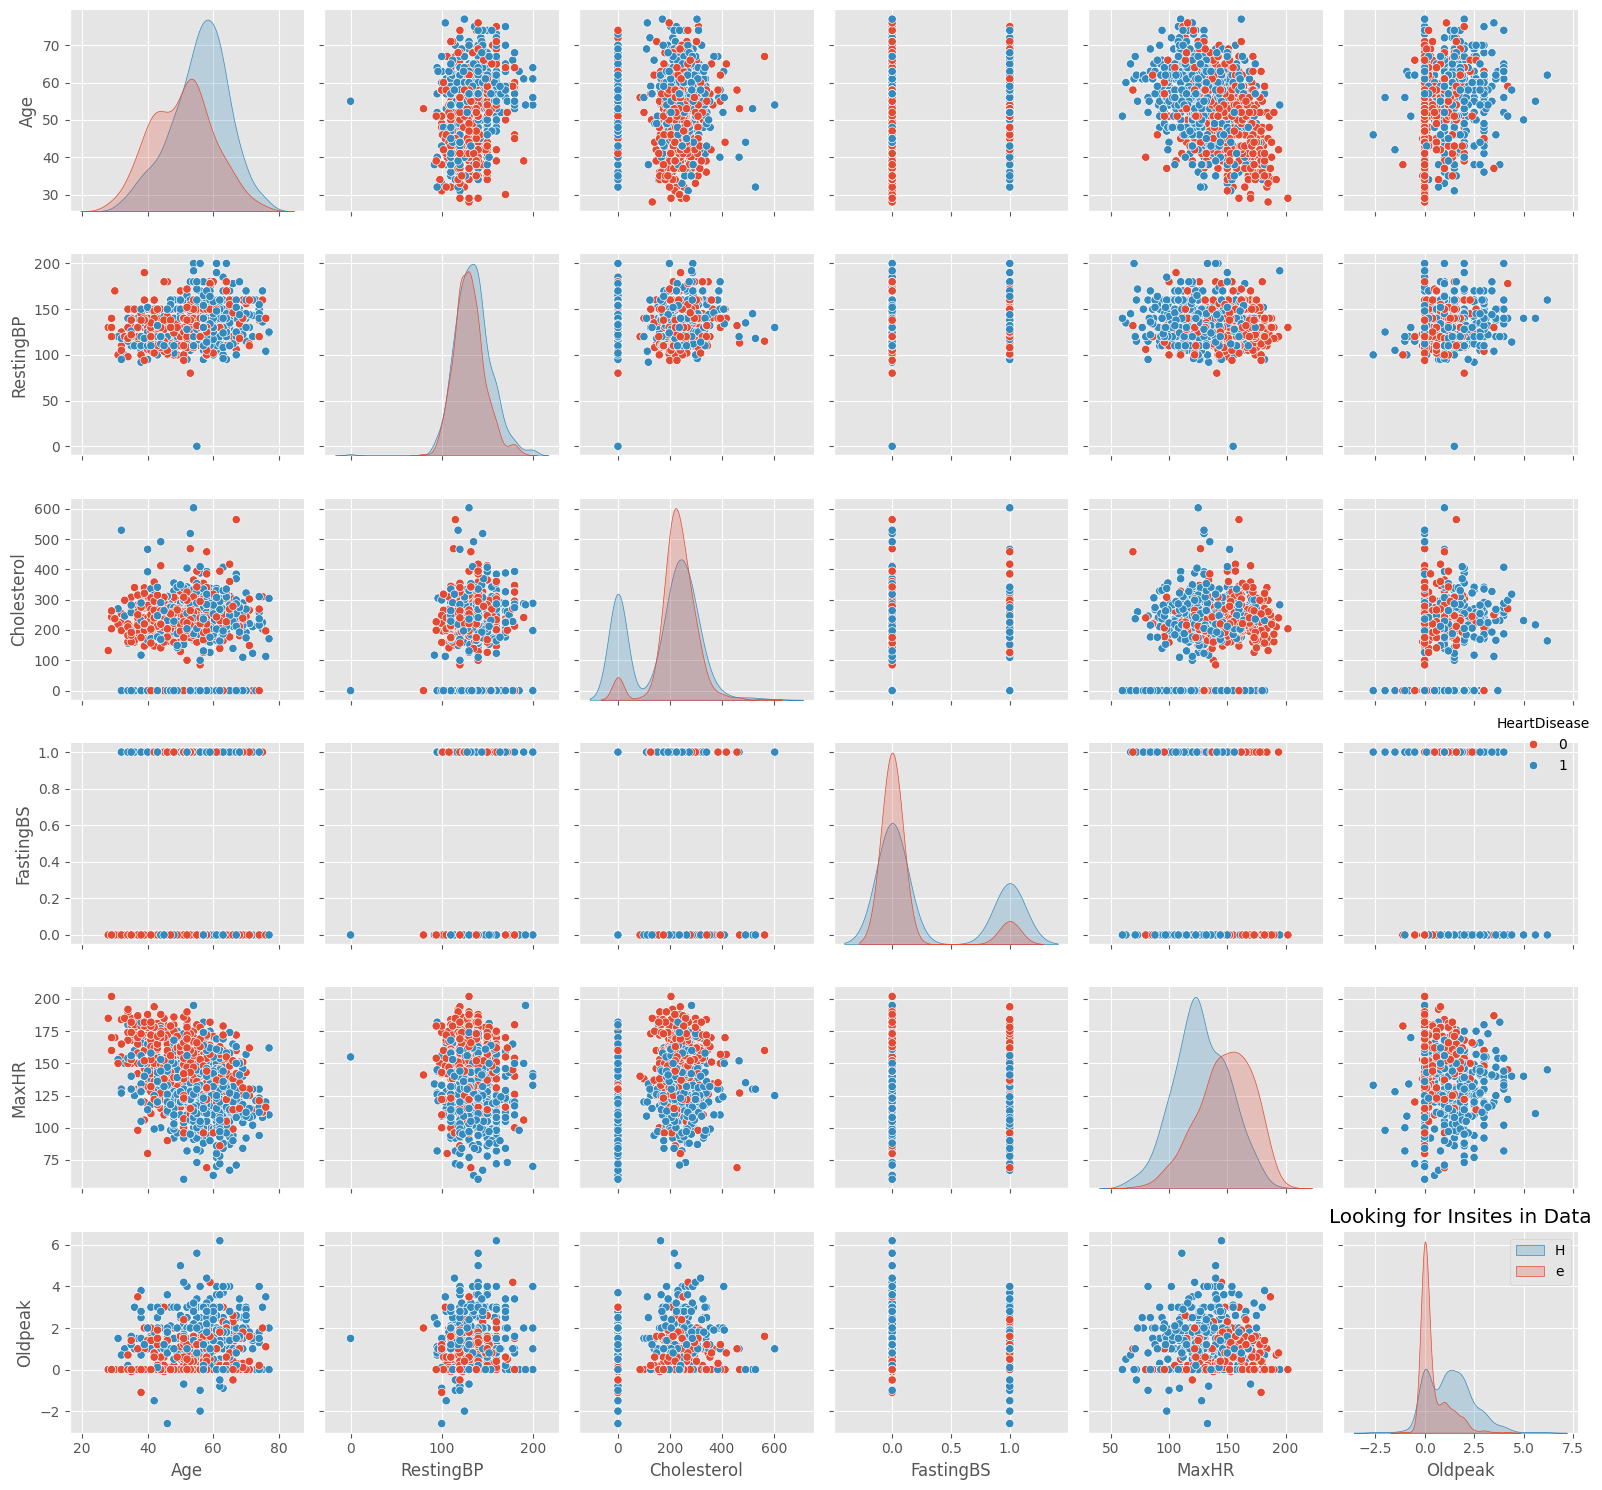

In [19]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

<Figure size 1500x1000 with 0 Axes>

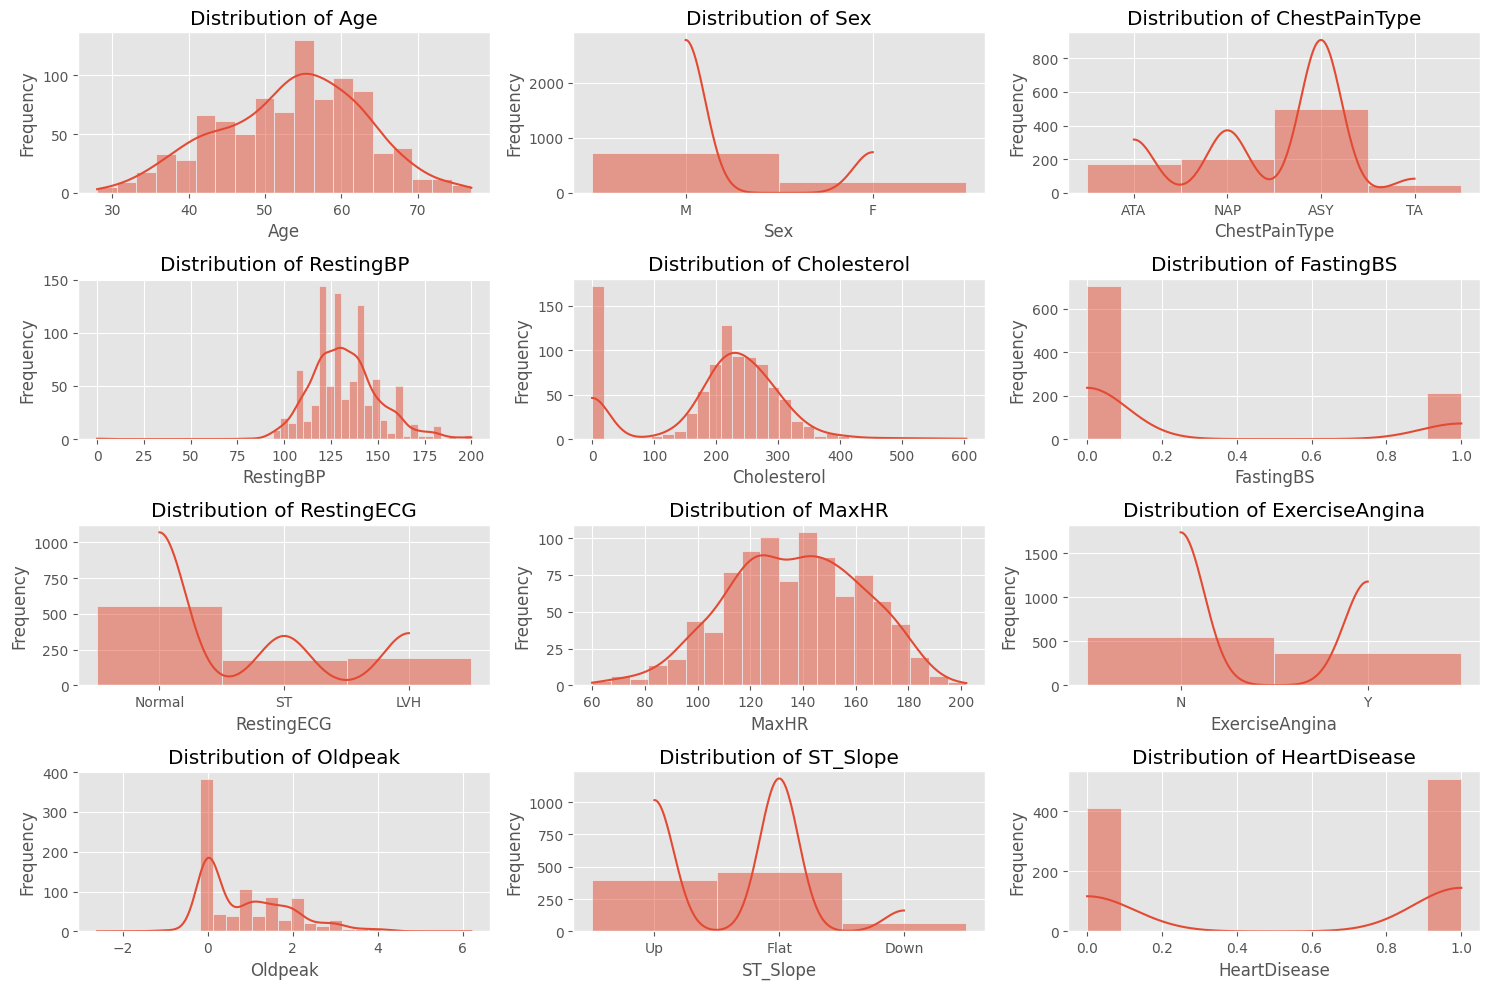

In [20]:
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}") 
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency') 
plt.tight_layout()

plt.show()

In [21]:
fig = px.box(df, y = "Age", x = "HeartDisease", title=f"Distribution of Age by Heart Disease Status")
fig.show()

In [22]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [23]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()


In [24]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [25]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()


# Preprocessing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [27]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [28]:
df[col_string].head()
for col in col_string:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())


The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [29]:
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [30]:
df_nontree=pd.get_dummies(df,columns=col_string,drop_first=False)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [31]:
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


In [32]:
x_col_nontree=df_nontree.columns.tolist()
x_col_nontree.remove(target)

# Modeling

## Non Tree Based Models

In [54]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
acc_log=[]
kf=model_selection.StratifiedKFold(n_splits=5)

In [55]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
# List Model Non Tree
models_non_tree = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Perceptron": Perceptron(random_state=42, max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "MLP Classifier": MLPClassifier(random_state=42, max_iter=500)

}

In [56]:
results_non_tree = []
for fold, (train_index, test_index) in enumerate(kf.split(X=df_nontree[x_col_nontree], y=df_nontree[target])):
    X_train, X_test = df_nontree.iloc[train_index][x_col_nontree], df_nontree.iloc[test_index][x_col_nontree]
    y_train, y_test = df_nontree.iloc[train_index][target], df_nontree.iloc[test_index][target]

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    print(f"Fold: {fold + 1}")
    for name, model in models_non_tree.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

        results_non_tree.append({
            "Fold": fold + 1,
            "Model": name,
            "Accuracy": acc,
            "ROC AUC": auc
        })
        print(f"\nModel: {name}")
        print(classification_report(y_test, y_pred))

results_df_non_tree = pd.DataFrame(results_non_tree)

results_df_non_tree = results_df_non_tree.sort_values(by=["Fold", "Model"]).reset_index(drop=True)
print(results_df_non_tree)

Fold: 1

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184


Model: Ridge Classifier
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        82
           1       0.93      0.81      0.87       102

    accuracy                           0.86       184
   macro avg       0.87      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184


Model: Perceptron
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        82
           1       0.83      0.93      0.88       102

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.85     

In [57]:
results_df_non_tree_sorted = results_df_non_tree.sort_values(
    by=["Accuracy", "ROC AUC"], 
    ascending=[False, False]
).reset_index(drop=True)

print(results_df_non_tree_sorted)


    Fold                Model  Accuracy   ROC AUC
0      1     SVC (RBF Kernel)  0.913043  0.950143
1      2          Naive Bayes  0.880435  0.960187
2      1                  KNN  0.880435  0.920433
3      1  Logistic Regression  0.875000  0.949067
4      4                  LDA  0.874317  0.892055
5      4     Ridge Classifier  0.868852       NaN
6      1     Ridge Classifier  0.864130       NaN
7      4  Logistic Regression  0.863388  0.897609
8      1           Perceptron  0.858696       NaN
9      1                  LDA  0.853261  0.947394
10     1          Naive Bayes  0.853261  0.937709
11     2  Logistic Regression  0.847826  0.942013
12     2                  LDA  0.847826  0.940220
13     3                  LDA  0.842391  0.922525
14     2     Ridge Classifier  0.842391       NaN
15     3     Ridge Classifier  0.842391       NaN
16     2     SVC (RBF Kernel)  0.836957  0.935079
17     1       MLP Classifier  0.831522  0.943089
18     3  Logistic Regression  0.831522  0.917862


In [58]:
results_df_non_tree_sorted

,Fold,Model,Accuracy,ROC AUC
0,1,SVC (RBF Kernel),0.913043,0.950143
1,2,Naive Bayes,0.880435,0.960187
2,1,KNN,0.880435,0.920433
3,1,Logistic Regression,0.875000,0.949067
4,4,LDA,0.874317,0.892055
5,4,Ridge Classifier,0.868852,NaN
6,1,Ridge Classifier,0.864130,NaN
7,4,Logistic Regression,0.863388,0.897609
8,1,Perceptron,0.858696,NaN
9,1,LDA,0.853261,0.947394


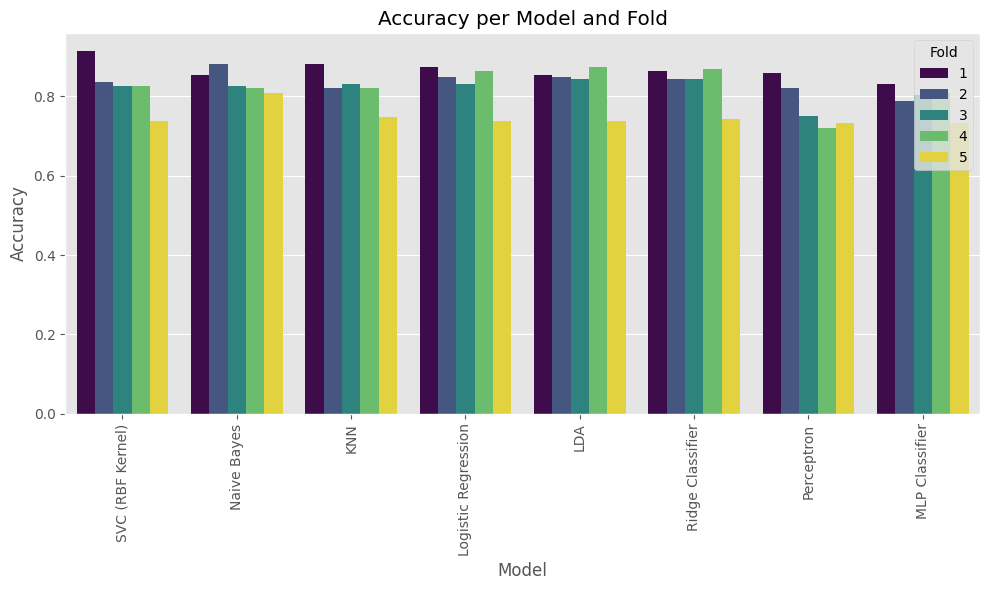

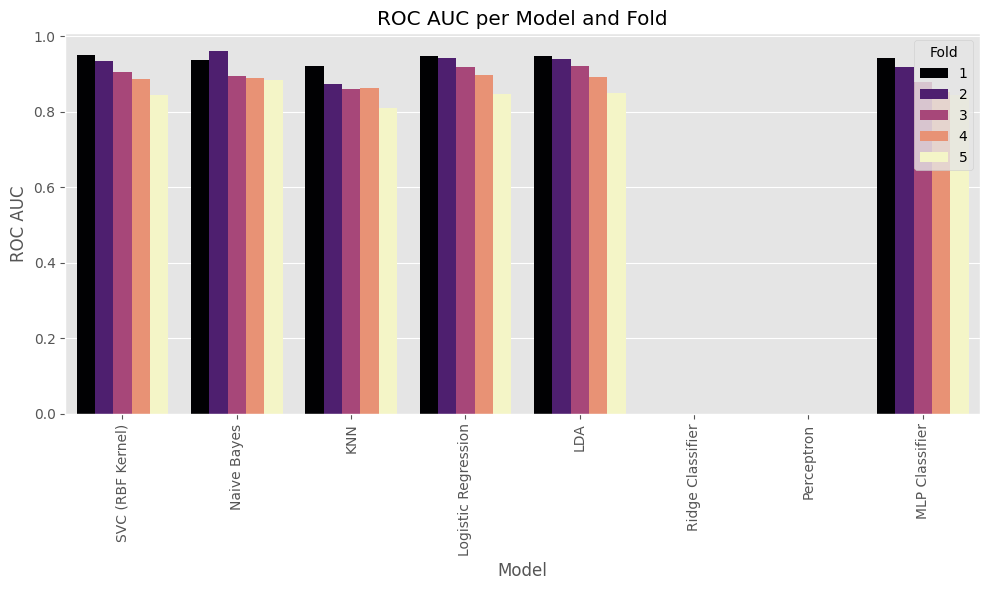

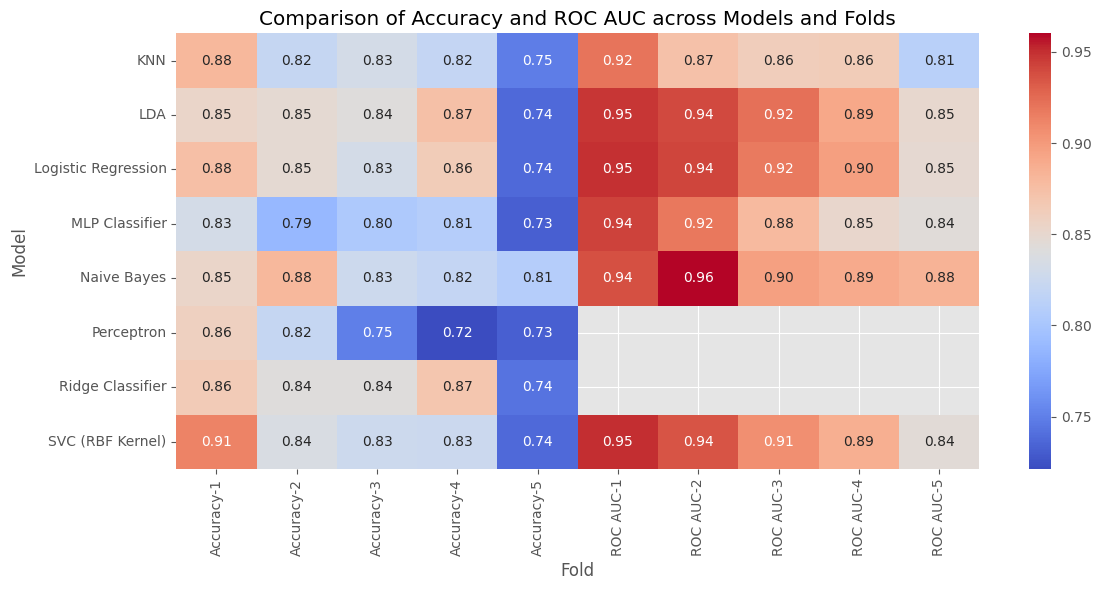

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_non_tree_sorted, x="Model", y="Accuracy", hue="Fold", palette="viridis")
plt.title('Accuracy per Model and Fold')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.legend(title='Fold', loc='upper right')
plt.tight_layout()
plt.show()

# Visualisasi ROC AUC dengan bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_non_tree_sorted, x="Model", y="ROC AUC", hue="Fold", palette="magma")
plt.title('ROC AUC per Model and Fold')
plt.xticks(rotation=90)
plt.ylabel('ROC AUC')
plt.xlabel('Model')
plt.legend(title='Fold', loc='upper right')
plt.tight_layout()
plt.show()

# Heatmap untuk perbandingan metrik (Accuracy dan ROC AUC) antara setiap model dan fold
heatmap_data = results_df_non_tree_sorted.pivot_table(
    index='Model', columns='Fold', values=['Accuracy', 'ROC AUC'], aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Comparison of Accuracy and ROC AUC across Models and Folds')
plt.ylabel('Model')
plt.xlabel('Fold')
plt.tight_layout()
plt.show()


# Tree Base Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold
import pandas as pd
models_tree = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)


In [49]:
# Loop untuk setiap fold
results_tree = []
for fold, (train_index, test_index) in enumerate(kf.split(X=df_tree[feature_col_tree], y=df_tree[target])):
    # Split data berdasarkan index fold
    X_train, X_test = df_tree.iloc[train_index][feature_col_tree], df_tree.iloc[test_index][feature_col_tree]
    y_train, y_test = df_tree.iloc[train_index][target], df_tree.iloc[test_index][target]
    
    print(f"Fold: {fold + 1}")
    
    # Loop untuk setiap model dalam models_tree
    for name, model in models_tree.items():
        # Melatih model
        model.fit(X_train, y_train)
        
        # Prediksi
        y_pred = model.predict(X_test)
        
        # Prediksi probabilitas jika ada
        y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Menghitung metrik
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
        
        # Menyimpan hasil
        results_tree.append({
            "Fold": fold + 1,
            "Model": name,
            "Accuracy": acc,
            "ROC AUC": auc
        })
        
        # Mencetak laporan klasifikasi untuk setiap model
        print(f"\nModel: {name}")
        print(classification_report(y_test, y_pred))

# Mengonversi hasil ke dalam DataFrame
results_df_tree = pd.DataFrame(results_tree)

# Mengurutkan hasil berdasarkan Fold dan Model
results_df_tree_sorted = results_df_tree.sort_values(by=["Fold", "Model"]).reset_index(drop=True)

# Mencetak hasil akhir
print(results_df_tree_sorted)

Fold: 1

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        82
           1       0.86      0.78      0.82       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184


Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        82
           1       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        82
           1       0.93      0.91      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       

In [50]:
results_df_tree_sorted = results_df_tree_sorted.sort_values(
    by=["Accuracy", "ROC AUC"], 
    ascending=[False, False]
).reset_index(drop=True)

print(results_df_tree_sorted)


    Fold              Model  Accuracy   ROC AUC
0      1  Gradient Boosting  0.913043  0.948350
1      1        Extra Trees  0.907609  0.949307
2      1           AdaBoost  0.896739  0.939264
3      1      Random Forest  0.891304  0.947154
4      4        Extra Trees  0.890710  0.942888
5      4  Gradient Boosting  0.879781  0.943975
6      4      Random Forest  0.879781  0.942526
7      1            XGBoost  0.875000  0.936753
8      1           LightGBM  0.869565  0.936035
9      2           LightGBM  0.869565  0.930655
10     2  Gradient Boosting  0.869565  0.924677
11     4           AdaBoost  0.868852  0.943009
12     2            XGBoost  0.864130  0.919656
13     4            XGBoost  0.863388  0.930572
14     2        Extra Trees  0.858696  0.931074
15     2      Random Forest  0.853261  0.937530
16     4           LightGBM  0.852459  0.937575
17     5            XGBoost  0.852459  0.922845
18     5  Gradient Boosting  0.852459  0.916445
19     2           AdaBoost  0.847826  0

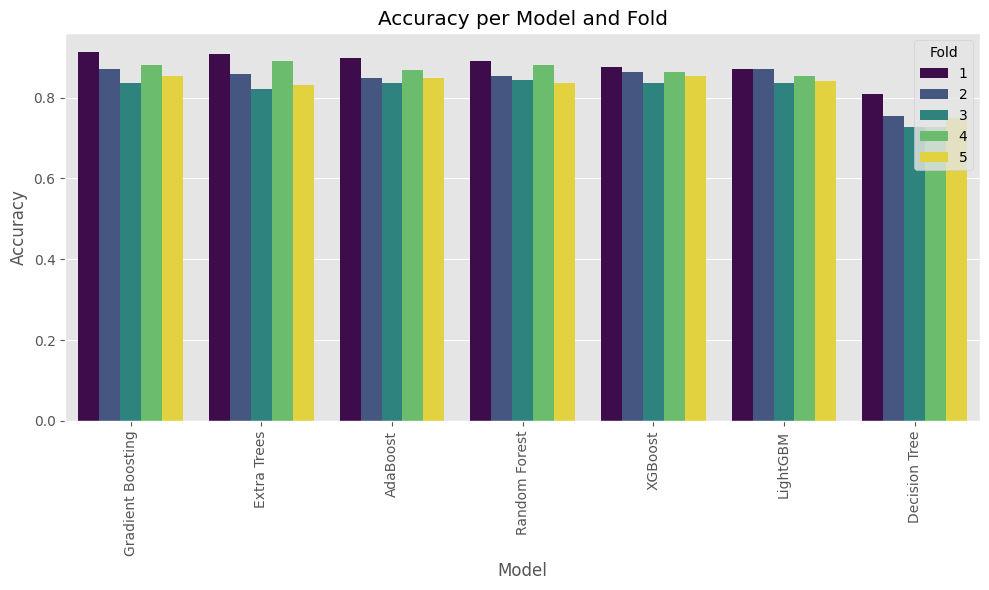

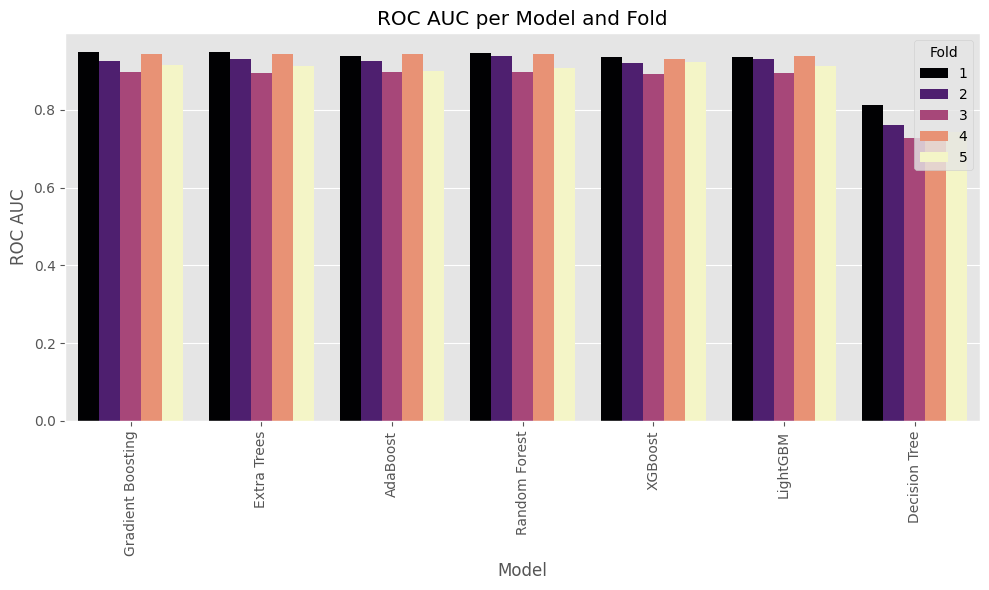

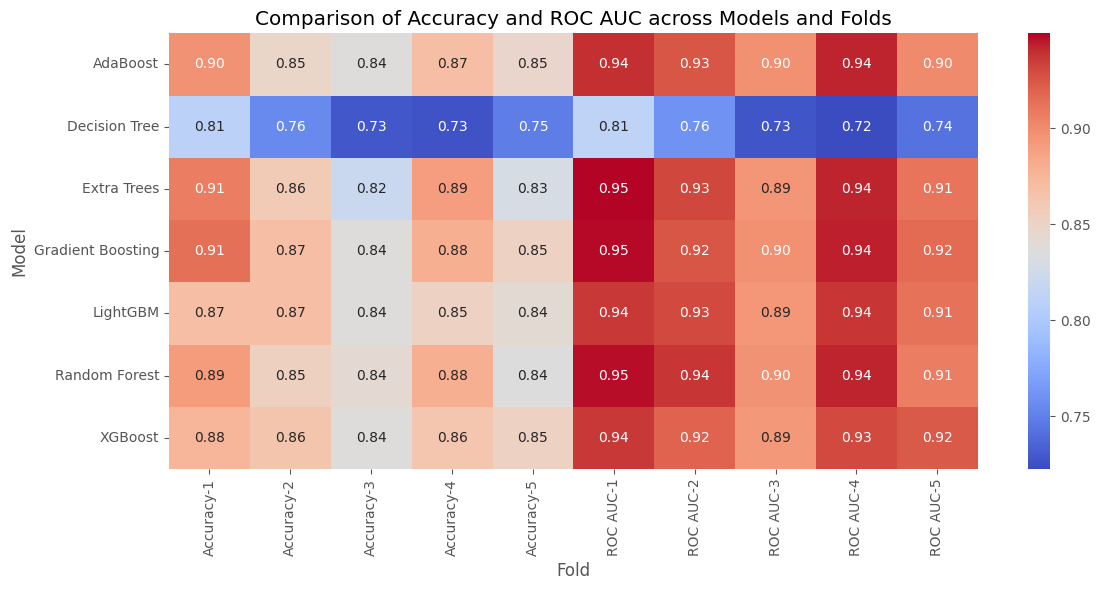

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_tree_sorted, x="Model", y="Accuracy", hue="Fold", palette="viridis")
plt.title('Accuracy per Model and Fold')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.legend(title='Fold', loc='upper right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_tree_sorted, x="Model", y="ROC AUC", hue="Fold", palette="magma")
plt.title('ROC AUC per Model and Fold')
plt.xticks(rotation=90)
plt.ylabel('ROC AUC')
plt.xlabel('Model')
plt.legend(title='Fold', loc='upper right')
plt.tight_layout()
plt.show()

heatmap_data = results_df_tree_sorted.pivot_table(
    index='Model', columns='Fold', values=['Accuracy', 'ROC AUC'], aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title('Comparison of Accuracy and ROC AUC across Models and Folds')
plt.ylabel('Model')
plt.xlabel('Fold')
plt.tight_layout()
plt.show()


# Mencari Best Model Terbaik

In [61]:
results_df_non_tree_sorted

,Fold,Model,Accuracy,ROC AUC
0,1,SVC (RBF Kernel),0.913043,0.950143
1,2,Naive Bayes,0.880435,0.960187
2,1,KNN,0.880435,0.920433
3,1,Logistic Regression,0.875000,0.949067
4,4,LDA,0.874317,0.892055
5,4,Ridge Classifier,0.868852,NaN
6,1,Ridge Classifier,0.864130,NaN
7,4,Logistic Regression,0.863388,0.897609
8,1,Perceptron,0.858696,NaN
9,1,LDA,0.853261,0.947394


In [67]:
results_df_tree_sorted

,Fold,Model,Accuracy,ROC AUC
0,1,Gradient Boosting,0.913043,0.948350
1,1,Extra Trees,0.907609,0.949307
2,1,AdaBoost,0.896739,0.939264
3,1,Random Forest,0.891304,0.947154
4,4,Extra Trees,0.890710,0.942888
5,4,Gradient Boosting,0.879781,0.943975
6,4,Random Forest,0.879781,0.942526
7,1,XGBoost,0.875000,0.936753
8,1,LightGBM,0.869565,0.936035
9,2,LightGBM,0.869565,0.930655


In [65]:
import pandas as pd

combined_df = pd.concat([results_df_tree_sorted, results_df_non_tree_sorted], ignore_index=True)
average_results = combined_df.groupby('Model').agg({
    'Accuracy': 'mean',
    'ROC AUC': 'mean'
}).reset_index()



print(average_results)


                  Model  Accuracy   ROC AUC
0              AdaBoost  0.859474  0.921107
1         Decision Tree  0.753778  0.753136
2           Extra Trees  0.861654  0.926043
3     Gradient Boosting  0.870361  0.926269
4                   KNN  0.820183  0.866054
5                   LDA  0.831100  0.910591
6              LightGBM  0.854015  0.922183
7   Logistic Regression  0.831088  0.910980
8        MLP Classifier  0.792979  0.887112
9           Naive Bayes  0.837640  0.913714
10           Perceptron  0.776580       NaN
11        Random Forest  0.860561  0.926237
12     Ridge Classifier  0.832187       NaN
13     SVC (RBF Kernel)  0.827786  0.904831
14              XGBoost  0.858387  0.920659


In [68]:
average_results

,Model,Accuracy,ROC AUC
0,AdaBoost,0.859474,0.921107
1,Decision Tree,0.753778,0.753136
2,Extra Trees,0.861654,0.926043
3,Gradient Boosting,0.870361,0.926269
4,KNN,0.820183,0.866054
5,LDA,0.831100,0.910591
6,LightGBM,0.854015,0.922183
7,Logistic Regression,0.831088,0.910980
8,MLP Classifier,0.792979,0.887112
9,Naive Bayes,0.837640,0.913714


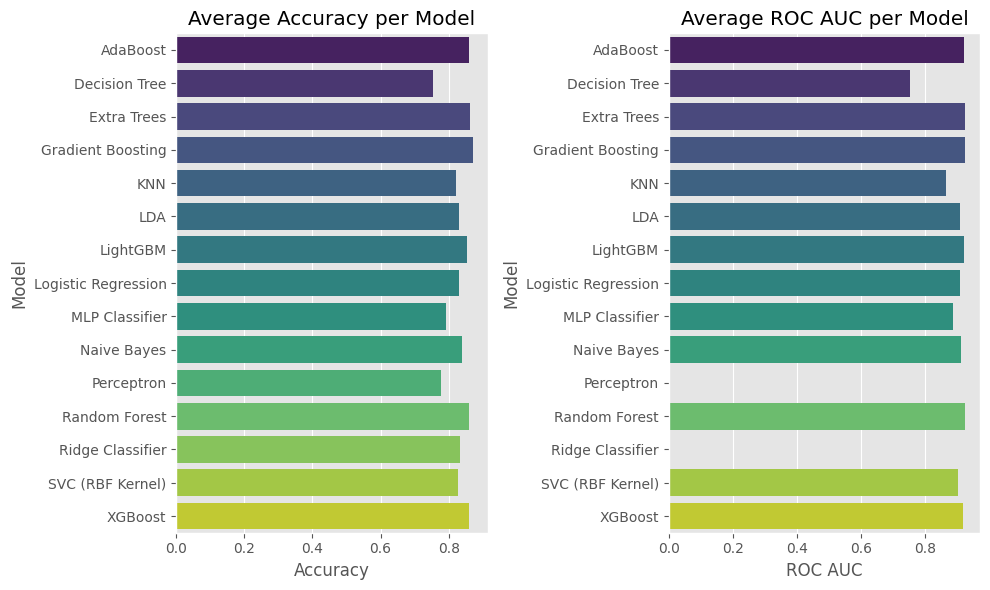

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))


plt.subplot(1, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=average_results, palette='viridis')
plt.title('Average Accuracy per Model')


plt.subplot(1, 2, 2)
sns.barplot(x='ROC AUC', y='Model', data=average_results, palette='viridis')
plt.title('Average ROC AUC per Model')


plt.tight_layout()
plt.show()


In [78]:
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah estimator dalam AdaBoost
    'learning_rate': [0.01, 0.1, 1.0]  # Learning rate
}

adaboost = AdaBoostClassifier(random_state=42)

# Stratified KFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results_adaboost = []
accuracies = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(kf.split(X=df_tree[feature_col_tree], y=df_tree[target])):
    X_train, X_test = df_tree.iloc[train_index][feature_col_tree], df_tree.iloc[test_index][feature_col_tree]
    y_train, y_test = df_tree.iloc[train_index][target], df_tree.iloc[test_index][target]
    
    print(f"Fold: {fold + 1}")
    

    grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Best Hyperparameters for Fold {fold + 1}: {grid_search.best_params_}")
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    results_adaboost.append({
        "Fold": fold + 1,
        "Model": "AdaBoost",
        "Accuracy": acc,
        "ROC AUC": auc,
        "Best Params": grid_search.best_params_
    })

    model_filename = f"adaboost_best_model_fold_{fold + 1}.pkl"
    joblib.dump(best_model, model_filename)
    print(f"Model terbaik disimpan di {model_filename}")
    
    print(f"\nAdaBoost - Fold {fold + 1} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    accuracies.append(acc)
    roc_aucs.append(auc)

results_df_adaboost = pd.DataFrame(results_adaboost)
results_df_adaboost_sorted = results_df_adaboost.sort_values(by=["Fold"]).reset_index(drop=True)
print("\nFinal Results:")
print(results_df_adaboost_sorted)
avg_accuracy = np.mean(accuracies)
avg_roc_auc = np.mean(roc_aucs)

print(f"\nAverage Accuracy: {avg_accuracy:.4f}")
print(f"Average ROC AUC: {avg_roc_auc:.4f}")


Fold: 1
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters for Fold 1: {'learning_rate': 0.1, 'n_estimators': 100}
Model terbaik disimpan di adaboost_best_model_fold_1.pkl

AdaBoost - Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        82
           1       0.89      0.83      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Fold: 2
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters for Fold 2: {'learning_rate': 0.1, 'n_estimators': 100}
Model terbaik disimpan di adaboost_best_model_fold_2.pkl

AdaBoost - Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy         

# Evaluasi

In [84]:
import joblib

# Memuat model terbaik yang disimpan (misalnya model dari fold tertentu)
model_filename = "adaboost_best_model_fold_3.pkl"  # Ganti dengan nama model yang sesuai
model = joblib.load(model_filename)

print(f"Model {model_filename} berhasil dimuat.")


Model adaboost_best_model_fold_3.pkl berhasil dimuat.


In [85]:
X=df_tree[feature_col_tree]
y=df_tree[target]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       410
           1       0.87      0.90      0.88       508

    accuracy                           0.87       918
   macro avg       0.87      0.87      0.87       918
weighted avg       0.87      0.87      0.87       918



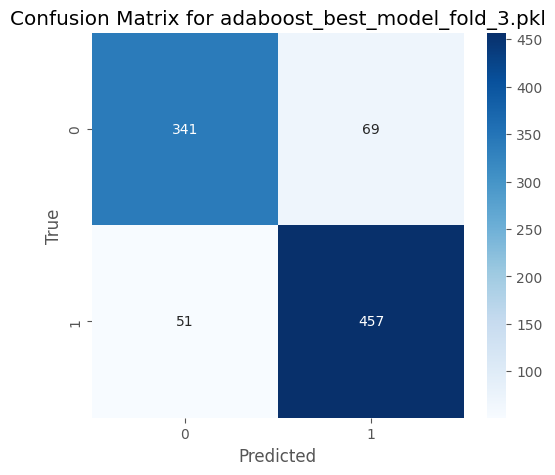

In [ ]:
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f"Confusion Matrix for {model_filename}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
